# 7장. 비지도 학습 - 클러스터링

---

## 학습 목표
- 간단한 트리 분류기를 만들어봅니다.
- 의사결정트리를 직접 사용해보고 최적의 파라미터를 찾는 기법에 대해서 학습합니다.
- 앙상블 기법을 직접 적용해봅니다.

---

## 목차

### 1. 클러스터링
1. K-means 군집화
2. Clustering 시각화
3. Gaussian Mixture Model (GMM)
4. K-means VS GMM


---

## 1. 클러스터링

### 1-1. K-means 군집화

K-means clustering은 가장 간단하고 널리 사용되는 클러스터링 알고리즘 입니다.

K-means는 데이터의 영역을 대표하는 Cluster-center를 찾아가며 데이터를 클러스터에 할당합니다.

### KMeans 함수 설명

- `KMeans(n_clusters,init,max_iter)`
    - n_clusters : 군집의 개수, 즉 군집 중심점의 개수

    - init : 초기 군집 중심점의 좌표를 설정할 방식 (default = ‘k-means++’)

    - max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료


- KMeans 속성
    - labels_ : 각 데이터가 속한 군집 중심점 label
    - cluster_centers_ : 각 군집 중심점의 좌표

### 실습

1. `KMeans()` 객체를 불러오고 내부 파라미터를설정해주세요.

2. Dataframe에 `kmeans`로 군집화된 `labels_`을 추가해주세요.

3. `iris_result`를 보고 군집화가 어떻게 이루어졌는지 확인해보세요.

### TIP

`df.groupby()` 함수로 데이터프레임의 특정 부분을 추출하여 정리할 수 있습니다.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def main():
    # Iris 데이터 불러오기
    iris = load_iris()
    
    # Iris 데이터 프레임 만들기
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    # 1.KMeans 객체 불러오기
    # Iris 데이터는 3개의 클래스를 가지고 있으므로 3개의 군집으로 나누어줍니다.
    # irisDF를 넣어 군집화를 진행합니다.
    kmeans = KMeans(n_clusters = 3).fit(irisDF)
    
    # 2.군집화 결과를 데이터 프레임에 추가합니다.
    irisDF['cluster'] = kmeans.labels_
    irisDF['target'] = iris.target
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    # target과 cluster의 개수에 대해 sepal_length 데이터를 표현합니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
if __name__ == "__main__":
    main()


target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64


---

### 1-2. PCA

이번엔 iris 데이터를 시각화해보겠습니다.

Iris 데이터는 sepal length, sepal width, petal length, petal width 총 4가지 feature를 가지고 있으므로 2차원 평면상에 표현하기 위해서는 feature의 차원을 2개로 축소시켜야합니다.


예시로 PCA(Principal Component Analysis)를 사용하여 4개의 feature dimension을 2개의 feature로 축소해보겠습니다.

- `PCA(n_components)`
    - n_components : 출력의 dimension

- `PCA.fit_transform(data)` : 데이터의 차원을 축소

### 실습

1. `KMeans()`를 불러오고 내부 인자를 설정해보세요.

2. `Visualize()`에서 PCA를 통해 Feature의 차원을 축소시켜보세요.

3. 축소된 feature `pca_x`와 `pca_y`를 데이터프레임에 추가해주세요.

4. 군집화 결과를 보고 어떻게 군집화가 됐는지 확인해보세요.

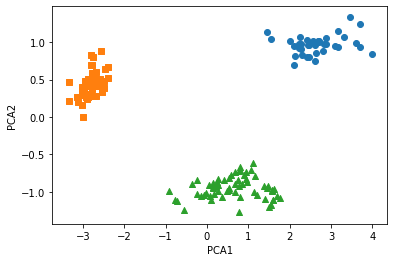

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)

def Visualize():
    from sklearn.decomposition import PCA
    
    # 시각화를 위해 PCA로 feature dimension을 2차원으로 감소시켜줍니다.
    # 1.PCA 객체를 불러오고 n_components를 설정합니다.
    pca = PCA(n_components = 2)
    
    # 2.iris.data를 PCA로 변환시켜줍니다.
    pca_transformed = pca.fit_transform(iris.data)

    # 3.데이터프레임에 차원 축소된 값을 넣어줍니다.
    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]
    
    # 군집된 값이 0, 1, 2 인 경우, 인덱스를 추출합니다.
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index

    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
def main():
    # 4.Kmeans 객체를 불러오고 fit()을 실행해주세요..
    kmeans = KMeans(n_clusters = 3).fit(irisDF)
    irisDF['cluster'] = kmeans.labels_
    irisDF['target'] = iris.target
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    
    Visualize()
    
if __name__ == "__main__":
    main()


---

### 1-3. Gaussian Mixture Model (GMM)

GMM clustering은 데이터가 여러 개의 가우시안 분포를 가지고 있다고 가정한 후 클러스터링을 진행하는 방식입니다.

여러 개의 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이중 어떤 정규 분포에 속하는지 결정합니다.

GMM은 sklearn.mixture 패키지에 있습니다. GMM의 경우에는 군집 중심점 (clustering center)가 없으므로 군집의 개수를 정해주면 됩니다.

- `GaussianMixture(n_components)`
    - n_components : 군집의 개수

### 실습

1. 작성된 코드를 보며 따라가 보세요.

2. ` GaussianMixture()`를 불러오고 `predict`를 예측해보세요.

3. `KMeans()`를 불러오고 `predict`를 예측해보세요.

4. `iris_df`에 `gmm_cluster_labels`, `kmeans_cluster_labels` 값을 넣어 데이터를 정리해보세요.

5. Kmeans와 GMM의 `iris_result`를 비교해보고 결과가 어떻게 되는지 확인해보세요.

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64 



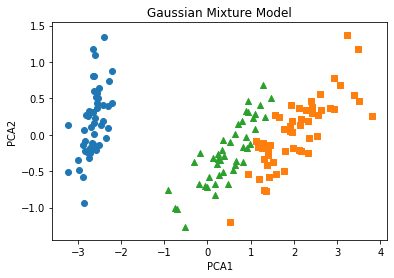

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

iris = load_iris()
feature_names = iris.feature_names

iris_df = pd.DataFrame(data =iris.data, columns = feature_names)
iris_df['target'] = iris.target

def Visualize():
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(iris.data)

    iris_df['pca_x'] = pca_transformed[:,0]
    iris_df['pca_y'] = pca_transformed[:,1]


    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = iris_df[iris_df['gmm_cluster'] == 0].index
    idx_1 = iris_df[iris_df['gmm_cluster'] == 1].index
    idx_2 = iris_df[iris_df['gmm_cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=iris_df.loc[idx_0, 'pca_x'], y= iris_df.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=iris_df.loc[idx_1, 'pca_x'], y= iris_df.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=iris_df.loc[idx_2, 'pca_x'], y= iris_df.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('Gaussian Mixture Model')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
def main():
	# 1.Gaussian Mixture Model 불러오기 및 학습
    gmm = GaussianMixture(n_components=3).fit(iris.data)
    # 2.predict 값 출력
    gmm_cluster_labels = gmm.predict(iris.data)
    
    # 3.DataFrame에 예측 값 넣기
    iris_df['gmm_cluster'] = gmm_cluster_labels
    
    # 결과 출력
    iris_result = iris_df.groupby(['target'])['gmm_cluster'].value_counts()
    print(iris_result,'\n')
    
    Visualize()
    
if __name__ == "__main__":
    main()


### 1-4. K-means VS GMM

### 임의의 데이터 생성

Clustering 알고리즘을 테스트하기 위한 데이터 생성기를 사용해보겠습니다.

대표적으로 `make_blob()` API를 사용합니다.
이를 이용해 타원형 분포를 가진 데이터를 만들어냅니다.

- `make_blob(n_samples, n_features, centers, cluster_std)`
    - n_samples : 생성할 데이터의 총 개수
    - n_features : 데이터의 피쳐 개수, 시각화를 위해 보통 2개로 설정
    - centers : 군집의 개수
    - cluster_std : 데이터의 표준편차

### 비교 분석하기

K-means는 군집화 범위가 원형입니다. 그러므로 데이터 세트의 분포가 원형에 가까울 수록 효율이 높아집니다.

하지만 데이터의 분포가 원형인 경우는 적습니다. 데이터의 분포가 만약 타원의 형태로 길쭉하게 늘어져 있다면 K-means는 제대로 군집화를 하지 못합니다.

이런 경우에는 데이터의 분포 방향에 따라 군집화를 하는 GMM을 사용하면 군집화 성능을 높일 수 있습니다.

### 실습

1. 작성된 코드를 보고 이해해보세요.

2. 결과 그래프를 보고 K-means와 GMM의 차이를 분석해보세요.

3. `Make_blobs()`에서 `center`를 바꿔가며 군집의 개수를 변경시키고 `K_mean()`와 `GMM()`으로 다시 군집화해보세요.

K-means Clustering
target  kmeans_label
0       0               67
        2               31
        1                2
1       1               97
        0                3
2       2               67
        0               33
Name: kmeans_label, dtype: int64
Gaussian Mixture Model
target  gmm_label
0       0            100
1       1             98
        0              2
2       2             92
        0              8
Name: gmm_label, dtype: int64


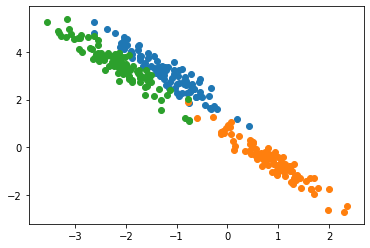

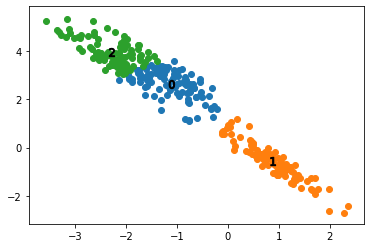

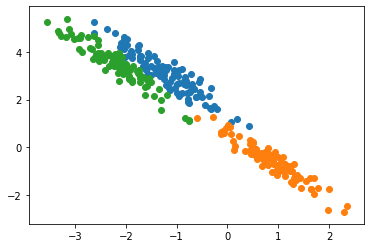

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# make_blobs()으로 데이터를 생성해보세요.
X, y = make_blobs(n_samples = 300, n_features =2, centers =3, cluster_std = 0.8, random_state=0)

# 데이터의 분포를 변형시키기 위해 transformation을 진행합니다.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X, transformation)

# 데이터 프레임 만들기 
clusterDF = pd.DataFrame(data = X_aniso, columns= ['ftr1','ftr2'])
clusterDF['target'] = y
target_list = np.unique(y)

# 생성된 데이터 시각화
def data_visualize():
    fig, ax = plt.subplots()
    for target in target_list:
        target_cluster = clusterDF[clusterDF['target'] == target]
        ax.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    
# K-Means Clustering
def K_means():
    # K-means
    k_means = KMeans(n_clusters = 3, random_state = 0) # KMeans clustering
    kmeans_label = k_means.fit_predict(X_aniso)         # 학습 및 예측
    clusterDF['kmeans_label']=kmeans_label             # 데이터프레임에 결과값 저장
    
    # Kmeans 군집의 중심값을 뽑아보세요.
    center = k_means.cluster_centers_                   # 군집별 중심값 추출
    
    # KMeans 군집 결과 시각화
    unique_labels = np.unique(kmeans_label)
    fig, ax = plt.subplots()
    
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
        center_x_y = center[label]
        ax.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
        ax.scatter(x = center_x_y[0], y = center_x_y[1], s = 70,color = 'k', marker = '$%d$' % label)
    
    print("K-means Clustering")
    print(clusterDF.groupby('target')['kmeans_label'].value_counts())

def GMM():
    # GMM Clutering
    gmm = GaussianMixture(n_components=3, random_state=0)   # GMM 불러오기
    gmm_label = gmm.fit(X_aniso).predict(X_aniso)           # 학습과 결과 예측
    clusterDF['gmm_label']=gmm_label                        # 예측 label 데이터프레임에 입력
    unique_labels = np.unique(gmm_label)
    
    # GMM Clustering 시각화
    fig, ax = plt.subplots()
    for label in unique_labels:
        label_cluster = clusterDF[clusterDF['gmm_label'] == label]
        plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'])
    
    print("Gaussian Mixture Model")
    print(clusterDF.groupby('target')['gmm_label'].value_counts())

def main():
    data_visualize()
    K_means()
    GMM()

if __name__ == "__main__":
    main()
